# From Self Implemented Linear Regression Algorithm                                                        
##Estimated coefficients:

---


###intercept = -1765371524.672145            

---


###slope= 2393.486305011515


---
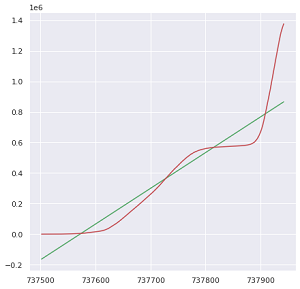



#From SkLearn's  Linear Regression Algorithm

##Estimated Cofficients
---



###Intercept:- -1725390612.5636

---
###Slope:-2339.28462518


---

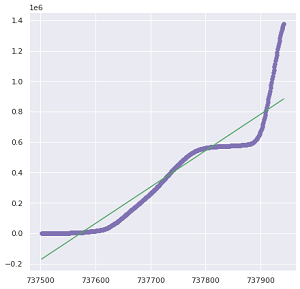


In [ ]:
#importing libraries into notebook
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime as dt
import numpy as np

In [ ]:
#reading the dataset
df = pd.read_csv('covid_19_india.csv')
tests = pd.read_csv("StatewiseTestingDetails.csv")

In [ ]:
#taking a look at the dataframe
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
#keeping only required columns
df = df[['Date', 'State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = ['date', 'state','cured','deaths','confirmed']

In [ ]:
#w.r.t todays date
# number of active cases in descending order
today = df[df.date == '2020-07-15']
max_confirmed_cases=today.sort_values(by="confirmed",ascending=False)
max_confirmed_cases.head()

,date,state,cured,deaths,confirmed
4126,2020-07-15,Maharashtra,149007,10695,267665
4136,2020-07-15,Tamil Nadu,97310,2099,147324
4115,2020-07-15,Delhi,93236,3446,115346
4122,2020-07-15,Karnataka,17390,842,44077
4117,2020-07-15,Gujarat,30503,2069,43637


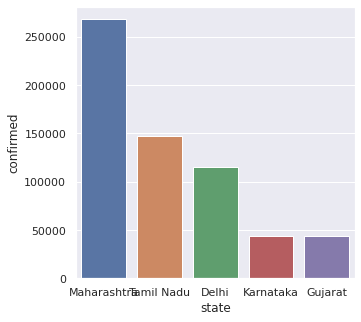

In [ ]:
#Getting states with maximum number of confirmed cases
top_states_confirmed=max_confirmed_cases[0:5]
#Bar-plot for states with top confirmed cases
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x="state",y="confirmed",data=top_states_confirmed)
plt.show()

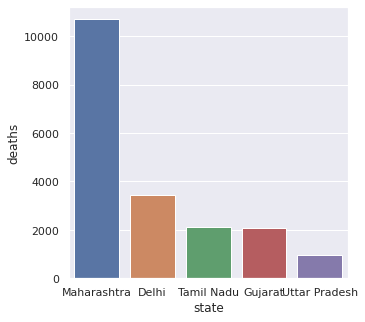

In [ ]:
#Sorting data w.r.t number of death cases
max_death_cases=today.sort_values(by="deaths",ascending=False)
#Getting states with maximum number of death cases
top_states_death=max_death_cases[0:5]
#Bar-plot for states with top death cases
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x="state",y="deaths",data=top_states_death)
plt.show()

In [ ]:
test_latest =  tests[tests.Date == '2020-07-15']
test_latest.head()

,Date,State,TotalSamples,Negative,Positive
62,2020-07-15,Andaman and Nicobar Islands,19061.0,NaN,176.0
478,2020-07-15,Andhra Pradesh,1217963.0,1182512,35451.0
885,2020-07-15,Arunachal Pradesh,34619.0,32450,491.0
1282,2020-07-15,Assam,589202.0,NaN,18666.0
1700,2020-07-15,Bihar,337212.0,NaN,20173.0


In [ ]:
#Sorting data w.r.t number of cured cases
max_tests_State=test_latest.sort_values(by="TotalSamples",ascending=False)
max_tests_State.head()

,Date,State,TotalSamples,Negative,Positive
11546,2020-07-15,Tamil Nadu,1736747.0,NaN,151820.0
7639,2020-07-15,Maharashtra,1413185.0,1132434,280751.0
12690,2020-07-15,Uttar Pradesh,1277241.0,NaN,41383.0
478,2020-07-15,Andhra Pradesh,1217963.0,1182512,35451.0
10784,2020-07-15,Rajasthan,1123902.0,1091930,26437.0


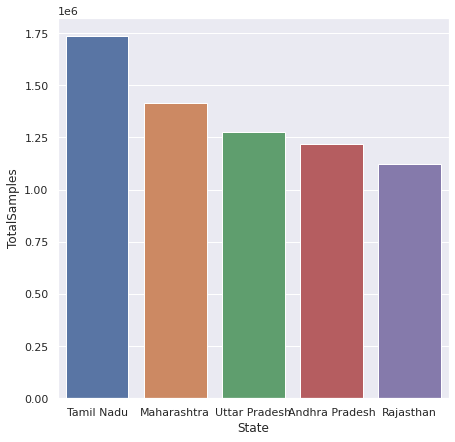

In [ ]:
#Making bar-plot for states with max test cases
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(x="State",y="TotalSamples",data=max_tests_State[0:5])
plt.show()

In [ ]:
#West Bengal and converting the Dates to ordinal form
wb = df[df.state == 'West Bengal']
wb['date'] = pd.to_datetime(wb['date']) 
wb['date']=wb['date'].map(dt.datetime.toordinal)
wb.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,date,state,cured,deaths,confirmed
208,737502,West Bengal,0,0,1
227,737503,West Bengal,0,0,1
247,737504,West Bengal,0,0,2
269,737505,West Bengal,0,0,3
292,737506,West Bengal,0,0,4


In [ ]:
#splitting data into training and testing data.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x=wb['date']
y=wb['confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
#Performing Linear Regression
lr = LinearRegression()
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))
#predicting out the dependent variable
print("Number of Cases in a given date",lr.predict(np.array([[737630]])))


Number of Cases in a given date [[133082.76858401]]


In [ ]:
m=float(lr.coef_)
m

2392.100948339702

In [ ]:
c=float(lr.intercept_)
c

-1764352339.7552304

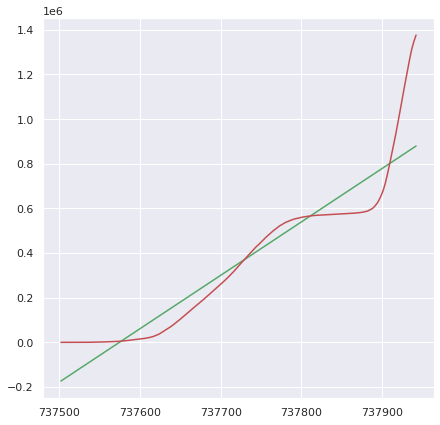

In [ ]:
plt.plot(x, m*x + c,'g')
plt.plot(x,y,'r')

#IMPORTANT OWN LINEAR REGRESSION ALGORITHM'

In [ ]:
def estimate_coef(x, y):
    
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
  
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

In [ ]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",marker = "o", s = 30)  
    # predicted requation
    y_pred = b[0] + b[1]*x  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
    plt.show()

Estimated coefficients:
intercept = -1765371524.672145  
slope= 2393.486305011515


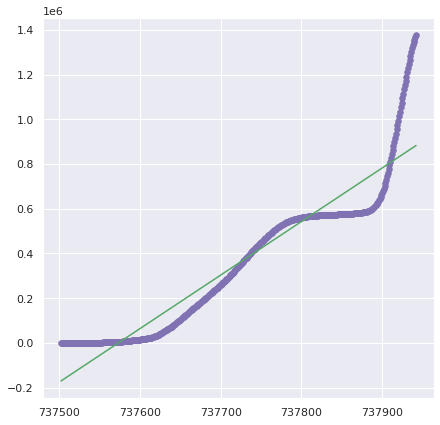

In [ ]:
def main():
    # data
    x=wb['date']
    y=wb['confirmed']  
    #coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nintercept = {}  \nslope= {}".format(b[0], b[1]))
    plot_regression_line(x, y, b)
    
main()